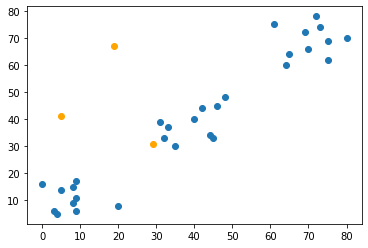

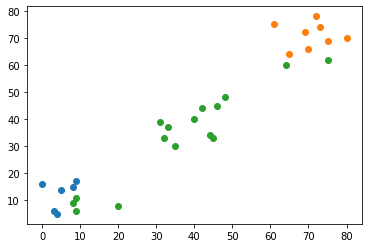

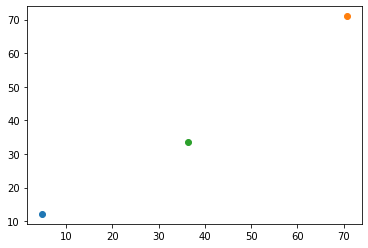

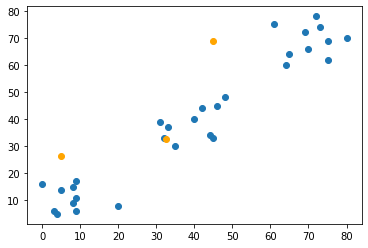

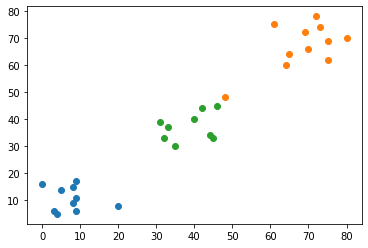

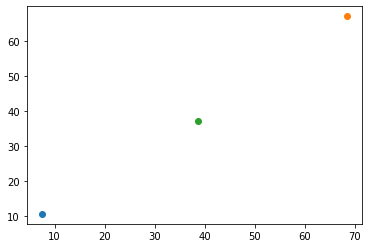

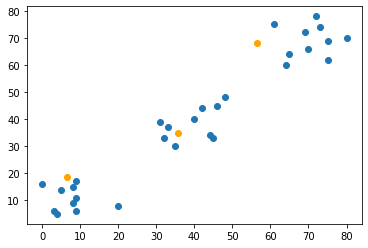

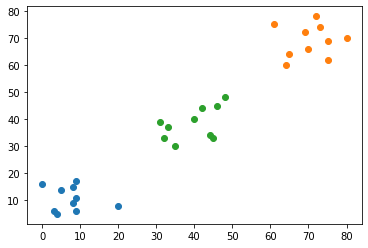

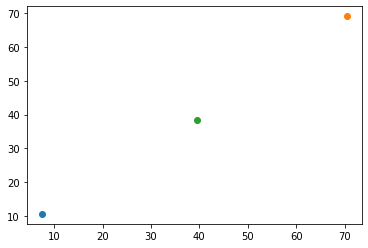

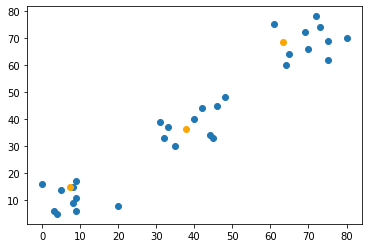

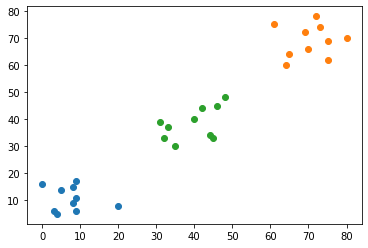

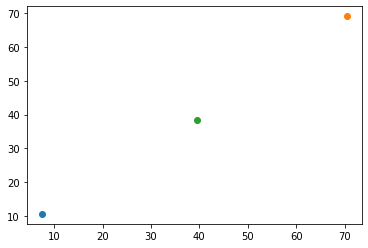

In [2]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

class Punto():
    def __init__(self, k):
        self.x=random.randint(10*(3*k), 10*(3*k+2))
        self.y=random.randint(10*(3*k), 10*(3*k+2))
    

class Centro():
    def __init__(self):
        self.x=random.randint(0,70)
        self.y=random.randint(0,70)
    
def distancia(xp,yp,xc,yc):
    return math.sqrt((xp-xc)**2 + (yp-yc)**2)
def media(grupo):
    xm=0
    ym=0
    for i in grupo:
        xm+=i[0]
        ym+=i[1]
    if len(grupo)==0:
        return 0, 0
    else:
        return xm/len(grupo), ym/len(grupo)

def varianza(distancia):
    var=0
    for i in range(len(distancia)):
        var+=(distancia[i])**2
    return var/len(distancia)
    
def run(centros, universo):
    k=3
    distancias=[]
    medias=[]
    varianzas_ideales=[]
    varianzas=[]
    grupos=[]
    for i in range(k):
        distancias.append([])
        grupos.append([])
    x=[p[0] for p in universo]
    y=[p[1] for p in universo]
    plt.scatter(x,y)
    # plt.show()

    xc=[p[0] for p in centros]
    yc=[p[1] for p in centros]
    plt.scatter(xc,yc, color="orange")
    plt.show()
    
    for punto in universo:
        minimo=100
        ahora=0
        for centro in centros:
            variable=distancia(punto[0],punto[1], centro[0], centro[1])
            if variable<minimo:
                minimo=variable
                posicion=ahora
            ahora+=1
        distancias[posicion].append(minimo)
        grupos[posicion].append([punto[0], punto[1]])
    
    
    for grupo in grupos:
        xg=[p[0] for p in grupo]
        yg=[p[1] for p in grupo]
        plt.scatter(xg,yg)
    plt.show()
    for grupo in grupos:
        if len(grupo)==0:
            grupo=[0,0]
        d_ideal=0
        xm, ym=media(grupo)
        medias.append([round(xm),round(ym)])

        plt.scatter(xm,ym)


    plt.show()
    
    return medias, varianzas_ideales,varianzas, grupos

if __name__=='__main__':
    medias=0
    k=3
    centros=[]
    universo=[]
    constante=[1,1,1]
    for i in range(k):
        centro=Centro()
        centros.append([centro.x, centro.y])
    for i in range(k):
        for j in range(10):
            punto=Punto(i)
            universo.append([punto.x, punto.y])
    actual=0
    grupos=1
    while actual!=grupos:
        actual=grupos
        medias, varianzas_ideales,varianzas, grupos=run(centros, universo)
        x_aum1=[centro[0] for centro in centros]
        y_aum1=[centro[1] for centro in centros]
        x_aum2=[media[0] for media in medias]
        y_aum2=[media[1] for media in medias]
        x_aum=[(x_aum1[i] + x_aum2[i])/2 for i in range(3)]
        y_aum=[(y_aum1[i] + y_aum2[i])/2 for i in range(3)]
        centros=[]
        for i in range(k):
            centros.append([x_aum[i], y_aum[i]])

        
